<a href="https://colab.research.google.com/github/BrunoBVR/DL-with-python/blob/main/3p4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bruno Vieira Ribeiro

In [ ]:
# import tensorflow as tf
# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Classifying movie reviews: a binary classification example

---

## The IMDB dataset

> You’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

In [ ]:
# Loading the dataset
from keras.datasets import imdb

(train_data, train_labels), (test_data,
                             test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data.

The variables `train_data` and `test_data` are lists of reviews; each review is a list of word indices (encoding a sequence of words). `train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

Given the restriction imposed by the `num_words` argument, no word index will exceed 10000:

In [ ]:
max([max(sequence) for sequence in train_data])

9999

Here's how we can decode a review to english:

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


Note that the indices are offset by 3 because 0, 1, and 2 are
reserved indices for "padding," "start of sequence," and "unknown."

In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparing the data

In [ ]:
# Encoding integer sequences into binary matrix (one-hot encoding)
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Creates an all-zeros matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        # Set specific indices of results[i] to 1s
        results[i, sequence] = 1
    return results

In [ ]:
# Vectorizing data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# Example:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# Vectorizing labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building the network

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()

# Input layer
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
# Output layer
model.add(layers.Dense(1, activation='sigmoid'))

## Compiling the model

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Validating

In [ ]:
# Set aside a validation set with 10000 points
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# Training for 20 epochs in mini-batches of 512 samples
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 47ms/step - loss: 0.5613 - accuracy: 0.7679 - val_loss: 0.4467 - val_accuracy: 0.8590
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3513 - accuracy: 0.8959 - val_loss: 0.3318 - val_accuracy: 0.8817
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2504 - accuracy: 0.9218 - val_loss: 0.2921 - val_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1941 - accuracy: 0.9380 - val_loss: 0.2751 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1571 - accuracy: 0.9499 - val_loss: 0.2887 - val_accuracy: 0.8839
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1313 - accuracy: 0.9589 - val_loss: 0.2926 - val_accuracy: 0.8854
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1102 - accuracy: 0.9675 - val_loss: 0.3240 - val_accuracy: 0.8775
Epoch 8/20
30

## Plotting the training and validation loss

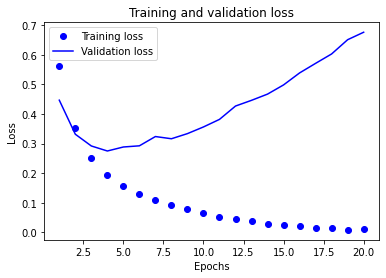

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

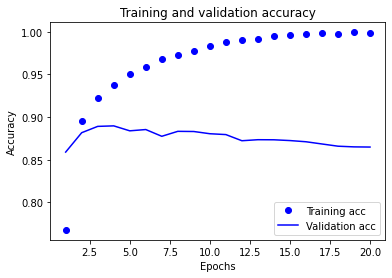

In [ ]:
plt.clf() # Clears the figure

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Retrain from scratch with 4 epochs

In [ ]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)



Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.5171 - accuracy: 0.7809
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.3014 - accuracy: 0.9052
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2212 - accuracy: 0.9266
Epoch 4/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1806 - accuracy: 0.9402


In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.2908 - accuracy: 0.8840


In [ ]:
results

[0.2908267378807068, 0.8839600086212158]